# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.


## Etapa 2 Crisp-DM: Entendimento dos dados

Cada cliente informou sobre 14 variáveis relativas a ele. Tais variáveis estão presentes na tabela abaixo com seus respectivos significados e tipos.


### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência da coleta das variáveis                                     |texto|
| id_cliente              |  Código de identificação                                      |inteiro|
| sexo                    |  M = 'Masculino'; F = 'Feminino'                                      |M/F|
| posse_de_veiculo        |  True = 'possui'; False = 'não possui'                                      |booleano|
| posse_de_imovel         |  True = 'possui'; False = 'não possui'                                      |booleano|
| qtd_filhos              |  Quantidade de filhos                                      |inteiro|
| tipo_renda              |  Tipo de renda (ex: assalariado, empresário, etc)                                      |texto|
| educacao                |  Grau de instrução (ex: secundário, superior, etc)                                      |texto|
| estado_civil            |  Estado civil (ex: solteiro, casado, etc)                                      |texto|
| tipo_residencia         |  Tipo de residência (ex: casa, governamental, etc)                                      |texto|
| idade                   |  Idade em anos                                      |inteiro|
| tempo_emprego           |  Tempo de emprego em anos                                      |numérica|
| qt_pessoas_residencia   |  Quantidade de pessoas que moram na residência                                      |inteiro|
| **renda**                  |  Renda mensal em reais                                     |numérica|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

Neste projeto, os pacotes utilizados são:
- Pandas: responsável pela leitura dos dados; 
- Ydata_profiling: na qual é utilizado o comando ProfileReport, onde são verificadas as descrições das variáveis e as relações que elas têm entre si; 
- Matplotlib.pyplot: permite a geração de gráficos dos dados analisados;
- Seaborn: gera gráficos com análises estatísticas (média, mediana, entre outras) dos dados;
- Comando DecisionTreeRegressor do pacote sklearn.tree para o ajuste de árvores de regressão sobre os dados;
- Comando train_test_split do pacote sklearn.model, que divide os dados em duas bases, uma de treino de uma de teste;
- Comando tree do pacote sklearn, na qual permite a visualização geral da árvore desenvolvida;
- Graphviz: permite a visualização detalhada da árvore de regressão criada.

In [2]:
!pip install ydata-profiling

     ---------------------------------------- 0.0/68.0 kB ? eta -:--:--
     ----------------- -------------------- 30.7/68.0 kB 640.0 kB/s eta 0:00:01
     ---------------------------------------- 68.0/68.0 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/400.1 kB ? eta -:--:--
   --------------------------------------  399.4/400.1 kB 12.6 MB/s eta 0:00:01
   ---------------------------------------- 400.1/400.1 kB 8.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/296.5 kB ? eta -:--:--
   -------------------------------------- - 286.7/296.5 kB 8.9 MB/s eta 0:00:01
   ---------------------------------------- 296.5/296.5 kB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/675.0 kB ? eta -:--:--
   ---------- ---------------------------- 174.1/675.0 kB 10.2 MB/s eta 0:00:01
   ----------------------- ---------------- 389.1/675

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you have pydantic 2.11.7 which is incompatible.


In [4]:
import pandas as pd
#from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import r2_score
import graphviz

ImportError: cannot import name 'TypeIs' from 'typing_extensions' (C:\Users\gusta\anaconda3\Lib\site-packages\typing_extensions.py)

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas. No caso, a tabela carregada está identificada como "renda". Nesta seção, serão verificados seus respectivos número de linhas e de colunas, além de uma breve visualização dela com o comando renda.head().

In [241]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [242]:
print("Número de linhas da tabela: {}".format(renda.shape[0]))
print("Número de colunas da tabela: {}".format(renda.shape[1]))

renda.head()

Número de linhas da tabela: 15000
Número de colunas da tabela: 15


,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


Percebe-se que além dos dados mencionados na etapa 2, há a coluna "Unnamed: 0", que corresponde ao índice dos dados gerado na conversão da tabela para o formato csv.

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

Primeiramente, será gerado um html onde estão presentes as análises univariadas de todas as variáveis presentes na tabela renda. Este html será salvo na pasta output onde encontra-se o código deste projeto.

In [243]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [244]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Apesar do html com as análises univariadas ter sido gerado, elas também serão reproduzidas neste notebook. Desta forma, nas próximas linhas encontram-se gráficos e descrições de cada variável, com excessão das colunas 'Unnamed: 0' e 'id_cliente', uma vez que estas não devem trazer informações relevantes em análises univariadas.

#### Variáveis Quantitativas

Começando com a variável resposta 'renda', que por ser uma variável contínua, sua análise será através de um histograma e boxplot.

##### 'renda'.

count     15000.000000
mean       5697.287057
std        8266.816289
min         118.710000
25%        2026.110000
50%        3499.720000
75%        6392.167500
max      245141.670000
Name: renda, dtype: float64

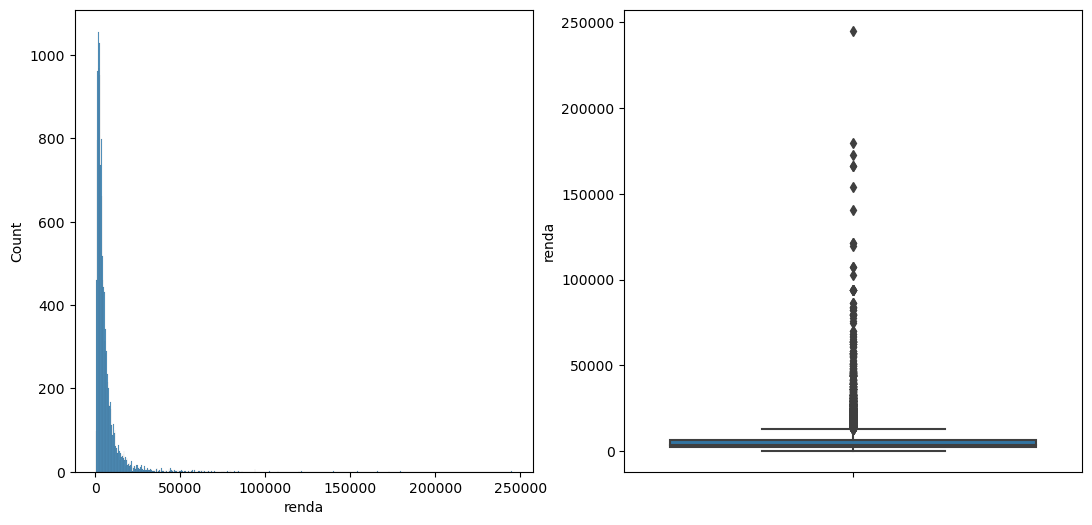

In [245]:
plt.rc('figure', figsize=(13, 6))
fig, axes = plt.subplots(1, 2)

ax0 = axes[0]
sns.histplot(x='renda', data=renda, ax = ax0)

ax1 = axes[1]
sns.boxplot(y='renda', data=renda, ax = ax1)

renda['renda'].describe()

De acordo com a descrição, a renda média dos clientes é de, aproximadamente, 5697(8267) reais, com a mediana em torno de 3500 reais. Considerando que a distância interquartil dessa variável é a diferença entre os valores de 75% (terceiro quartil) e 25% (primeiro quartil), ela é: 6392.1675 - 2026.1100 = 4366.0575. Os possíveis outliers são aqueles que têm valores maiores do que o limite superior, sendo este calculado pela soma do terceiro quartil com 1,5 vezes a diferença interquartil, ou seja 6392.1675 + 1.5 x 4366.0575 = 12941.2537. Desta forma, os valores de renda acima de 12941.25 são possíveis outliers.

##### 'tempo_emprego'.

count    12427.000000
mean         7.722635
std          6.711189
min          0.117808
25%          2.973973
50%          6.013699
75%         10.120548
max         42.906849
Name: tempo_emprego, dtype: float64

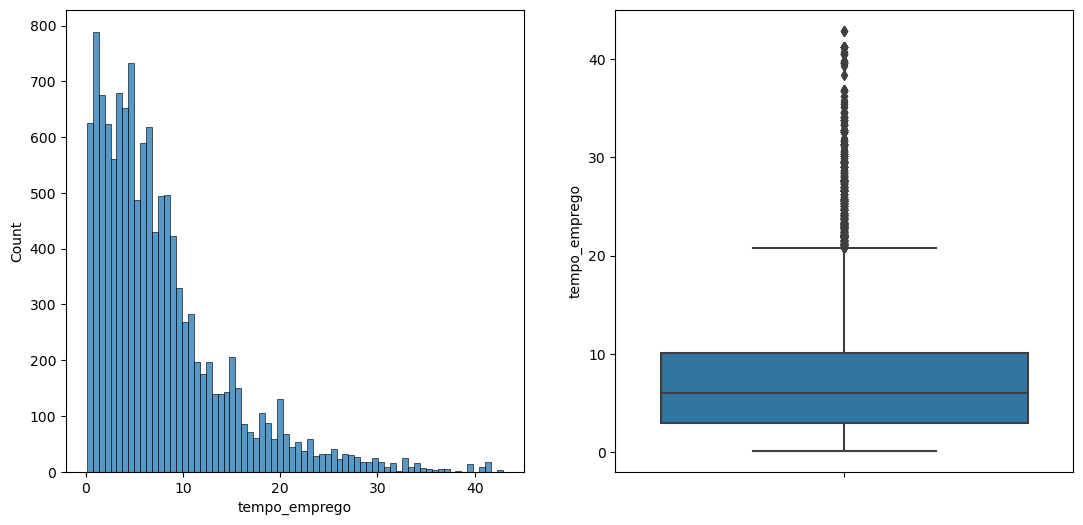

In [246]:
plt.rc('figure', figsize=(13, 6))
fig, axes = plt.subplots(1, 2)

ax0 = axes[0]
sns.histplot(x='tempo_emprego', data=renda, ax = ax0)

ax1 = axes[1]
sns.boxplot(y='tempo_emprego', data=renda, ax = ax1)

renda['tempo_emprego'].describe()

A média do tempo de emprego das pessoas em questão é próximo de 7(6) anos. Além disso, verifica-se que a maior parte das pessoas tem tempo de emprego entre 3 e 10 anos. Há possíveis outliers acima dos 20 anos de emprego.

##### 'idade'.

count    15000.000000
mean        43.882333
std         11.273155
min         22.000000
25%         34.000000
50%         43.000000
75%         53.000000
max         68.000000
Name: idade, dtype: float64

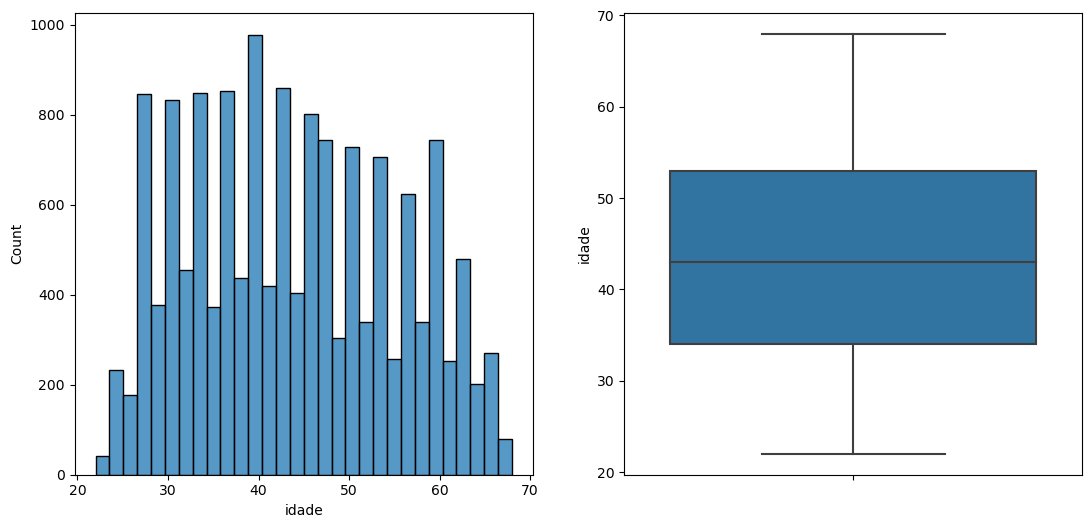

In [247]:
plt.rc('figure', figsize=(13, 6))
fig, axes = plt.subplots(1, 2)

ax0 = axes[0]
sns.histplot(x='idade', data=renda, ax = ax0)

ax1 = axes[1]
sns.boxplot(y='idade', data=renda, ax = ax1)

renda['idade'].describe()

A média das idades dos clientes é de 43(11) anos. É notável que a maior parte deles estão entre 34 e 53 anos.

##### 'qtd_filhos'.

<AxesSubplot:xlabel='qtd_filhos', ylabel='count'>

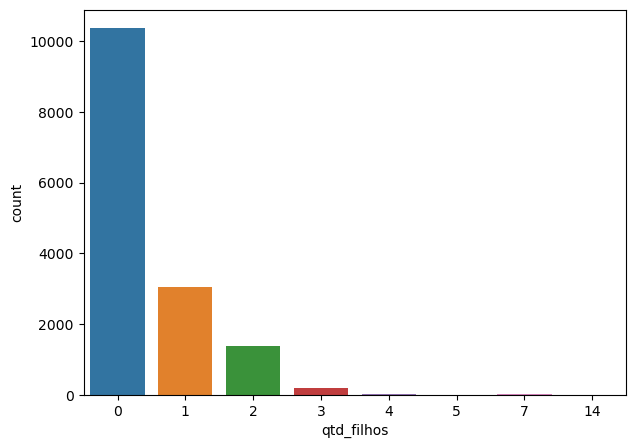

In [248]:
plt.rc('figure', figsize=(7, 5))

sns.countplot(x='qtd_filhos', data=renda)


A maior parte das pessoas analisadas não têm filhos.

##### 'qt_pessoas_residencia'.

<AxesSubplot:xlabel='qt_pessoas_residencia', ylabel='count'>

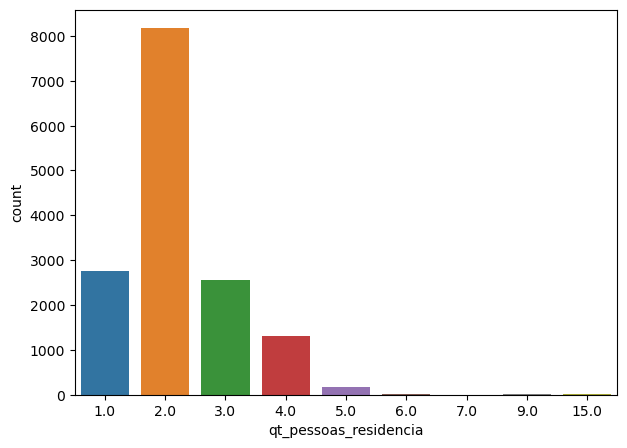

In [249]:
plt.rc('figure', figsize=(7,5))

sns.countplot(x='qt_pessoas_residencia', data=renda)

Em geral, os frequentadores deste banco moram em conjunto com mais uma pessoa. Por outro, a quantidade de pessoas que moram sozinhas é muito semelhante à das que moram com mais duas pessoas.

#### Variáveis Qualitativas

##### 'data_ref'.

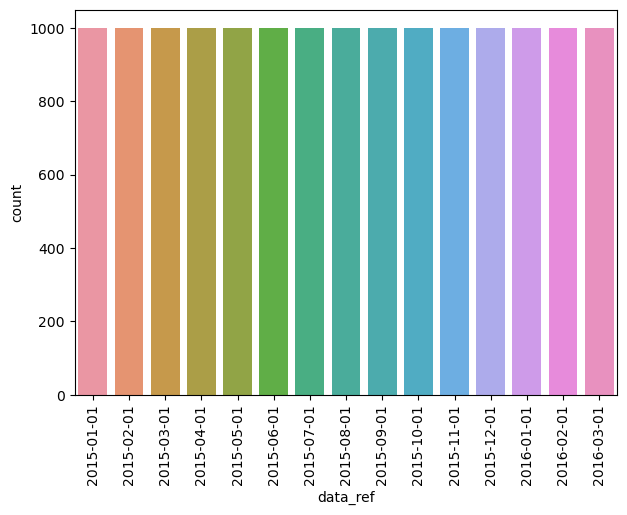

In [250]:
plt.rc('figure', figsize=(7,5))

datas = sns.countplot(x='data_ref', data=renda)
datas.tick_params(axis='x', rotation=90)

Os dados desta planilha foram tomados entre janeiro de 2015 a março de 2016, sem que haja uma data dominate entre eles, ou seja, em cada dia foram reunidas as informações de 1000 clientes obtidas durante o mês anterior.

##### 'sexo'.

<AxesSubplot:xlabel='sexo', ylabel='count'>

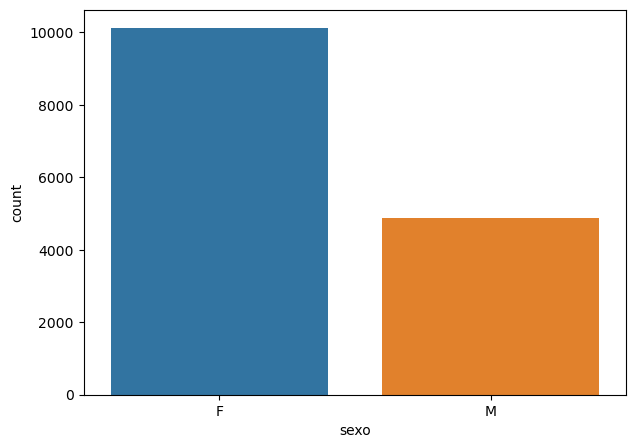

In [251]:
sns.countplot(x='sexo', data=renda)

Verifica-se uma predominância de clientes do sexo feminino.

##### 'posse_de_veiculo'.

<AxesSubplot:xlabel='posse_de_veiculo', ylabel='count'>

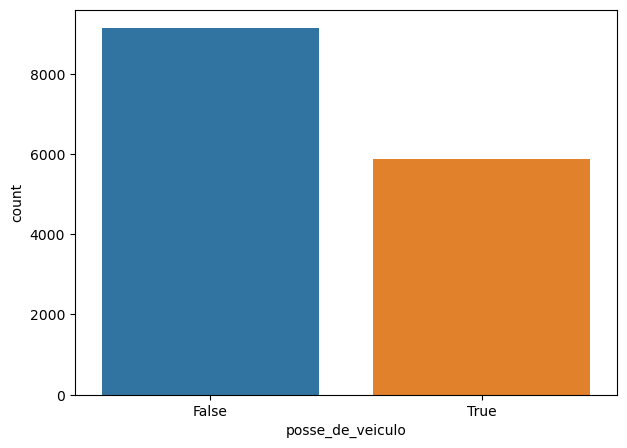

In [252]:
sns.countplot(x='posse_de_veiculo', data=renda)

A maior parte dos clientes não possuem veículo.

##### 'posse_de_imovel'.

<AxesSubplot:xlabel='posse_de_imovel', ylabel='count'>

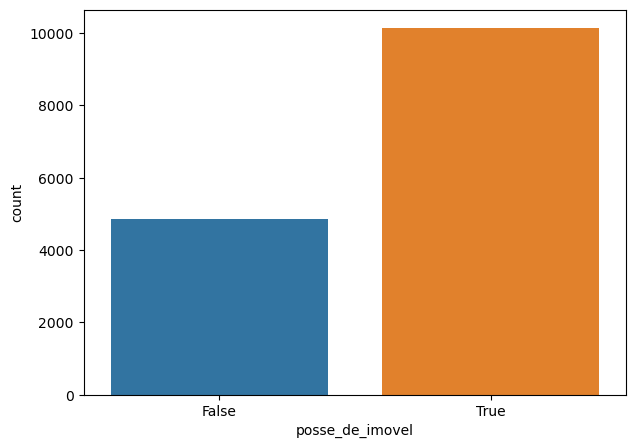

In [253]:
sns.countplot(x='posse_de_imovel', data=renda)

Por outro lado, a quantidade de pessoas que possuem imóvel é quase o dobro das que não possuem.

##### 'tipo_renda'.

<AxesSubplot:xlabel='tipo_renda', ylabel='count'>

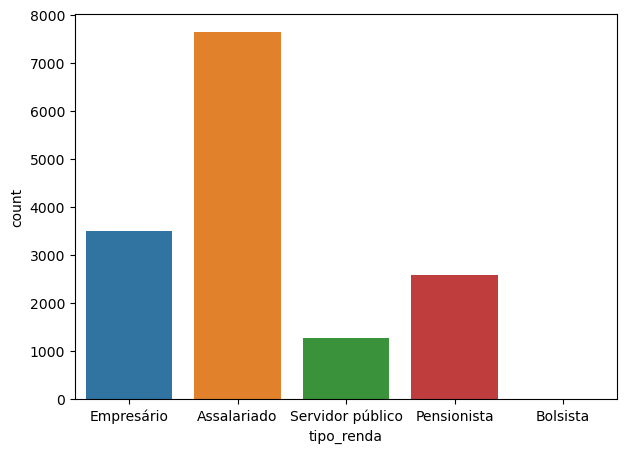

In [254]:
sns.countplot(x='tipo_renda', data=renda)

O tipo de renda predominante é a de trabalhadores assalariados. Enquanto que quase não há bolsistas no conjunto analisado.

##### 'educacao'.

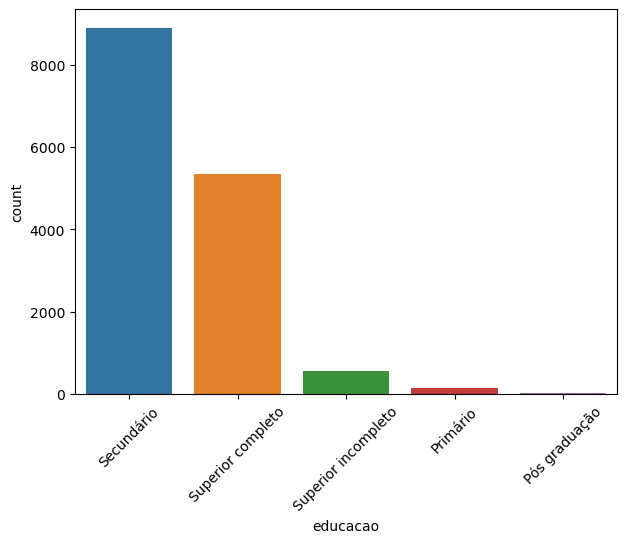

In [255]:
educ = sns.countplot(x='educacao', data=renda)
educ.tick_params(axis='x', rotation=45)

Verifica-se que a maior parte das pessoas possui a educação no nível secundário, seguido pelos que possuem terminaram o nível superior. 

##### 'estado_civil'.

<AxesSubplot:xlabel='estado_civil', ylabel='count'>

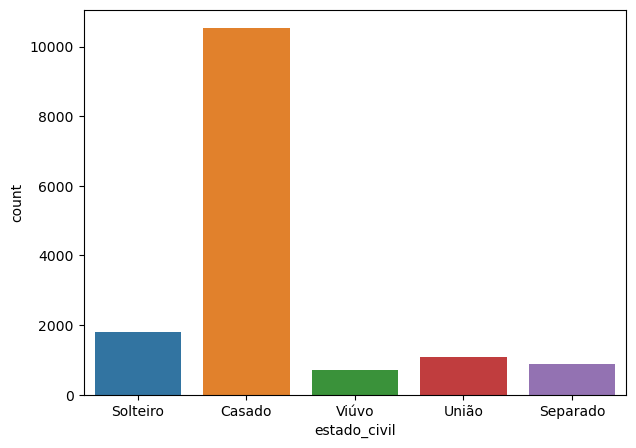

In [256]:
sns.countplot(x='estado_civil', data=renda)

A maior parte dos cliente são casados, enquanto entre os estados civis restantes, percebe-se um leve predomínio dos solteiros.

##### 'tipo_residencia'.

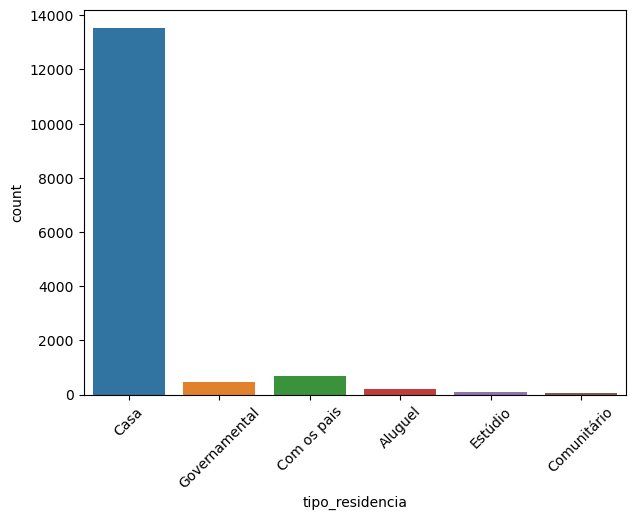

In [257]:
resid = sns.countplot(x='tipo_residencia', data=renda)
resid.tick_params(axis='x', rotation=45)

Há um claro predomínio de residências do tipo casa, de forma que quase não são notadas diferenças entre as quantidades dos outros tipos.

### Entendimento dos dados - Bivariadas




Nesta seção serão realizadas as análises bivariadas da variável resposta 'renda' em função das variáveis explicativas, com excessão das variáveis 'id_cliente' e 'Unnamed: 0'. No caso das variaveis quantitativas, serão verificadas as correlações entre elas e a variável resposta 'renda'. Para as variáveis qualitativas, veremos tanto a estabilidade temporal de cada variável, quanto a da média da variável 'renda' de acordo com as explicativas.

### Variáveis Quantitativas

Começando pelas variáveis quantitativas, vejamos as Matrizes de Dispersão e Correlação delas, além do Clustermap: 

In [258]:
# separando as variáveis quantitativas
quantitativas = renda[['qtd_filhos', 'idade', 'tempo_emprego',
              'qt_pessoas_residencia', 'renda']]

#### Matriz de Dispersão

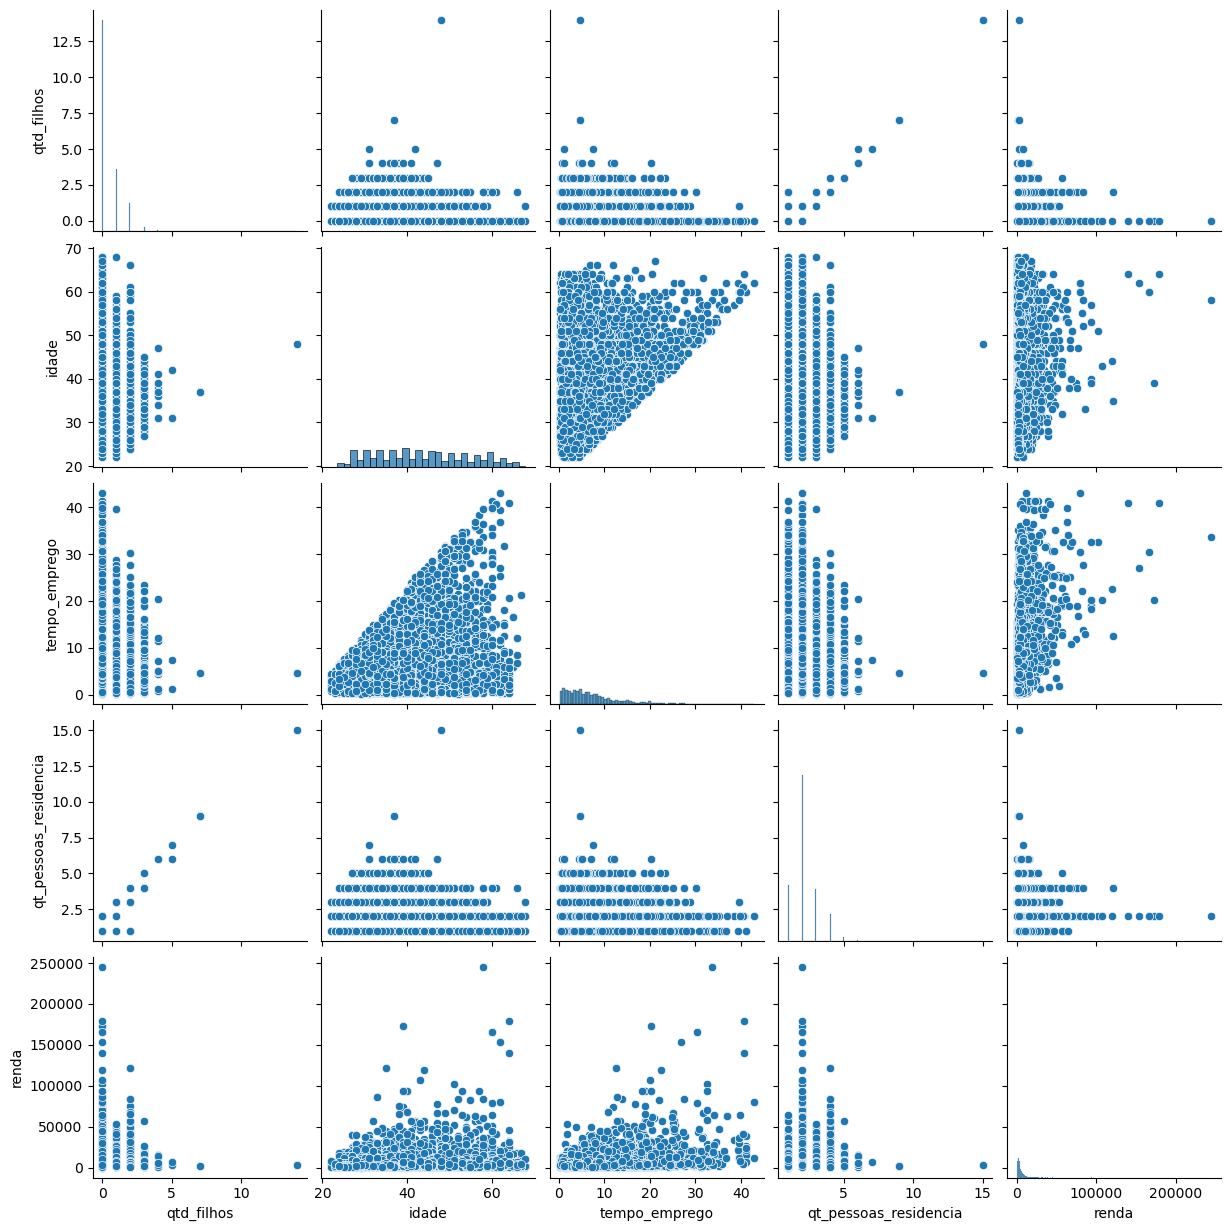

In [259]:
sns.pairplot(quantitativas)
plt.show()

A Análise da matriz de dispersão, retorna os seguintes insights:
- As pessoas com maiores rendas tendem a ter menor quantidade de filhos, sendo maior nos casos em que o cliente ou não tem filhos ou tem dois;
- Há uma maior concentração de renda nas pessoas que vivem com mais uma única na residência;
- Nos casos das variáveis 'idade' e 'tempo_emprego', a renda está, em geral, dispersa entre 0 e 50000, não tendo como afirmar diretamente a influência delas.

#### Clustermap

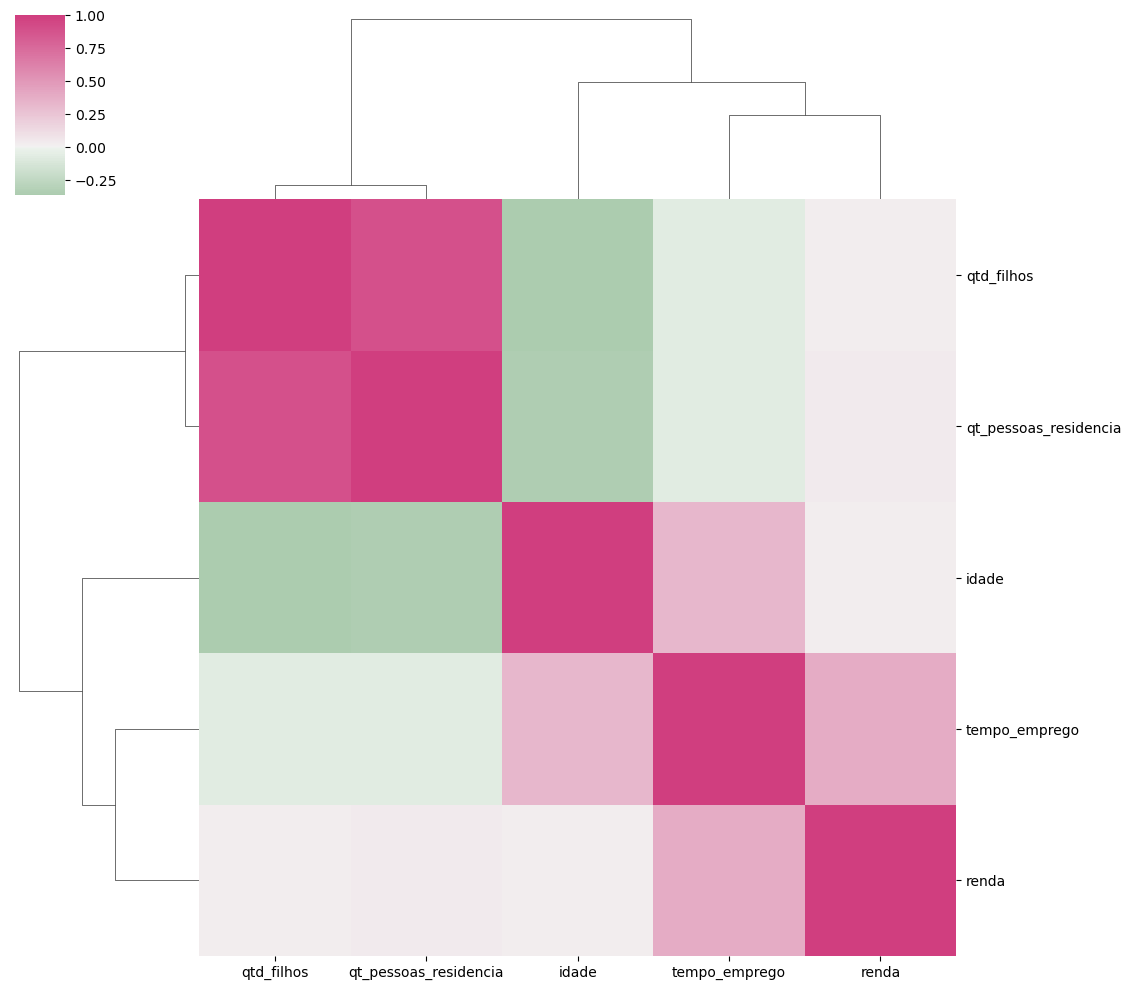

In [260]:
cmap = sns.diverging_palette(h_neg=850, h_pos=350, as_cmap=True)

cluster = sns.clustermap(quantitativas.corr(), figsize=(10, 10), center = 0, cmap=cmap)
plt.setp(cluster.ax_heatmap.get_yticklabels(), rotation=0)
plt.show()

A observação do clustermap mostra que a variável quantitativa mais correlacionada à 'renda' é a 'tempo_emprego', cuja correlação está entre 0.25 e 0.50. As três variáveis restantes estão muito próximas de zero. 

#### Matriz de Correlação 

In [261]:
quantitativas.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.360426,-0.063220,0.889777,0.029346
idade,-0.360426,1.000000,0.321573,-0.339320,0.022435
tempo_emprego,-0.063220,0.321573,1.000000,-0.065670,0.385013
qt_pessoas_residencia,0.889777,-0.339320,-0.065670,1.000000,0.047842
renda,0.029346,0.022435,0.385013,0.047842,1.000000


Tal como foi visto no clustermap, a variável quantitativa com maior correlação com a variável resposta 'renda' é a 'tempo_emprego', visto que sua correlação é de 0.38. Nas variáveis restantes ('qtd_filhos', 'idade' e 'qt_pessoas_residencia'), a correlação varia entre 0.02 e 0.04, sendo elas extremamente baixas para afirmar que são influenciaveis à renda da pessoa.

#### Gráfico de Dispersão

Dado que a maior correlação está entre a 'renda' e o 'tempo_emprego', vejamos de forma mais aprofundada o gráfico de dispersão de tais variáveis, com a reta de tendência nele presente.

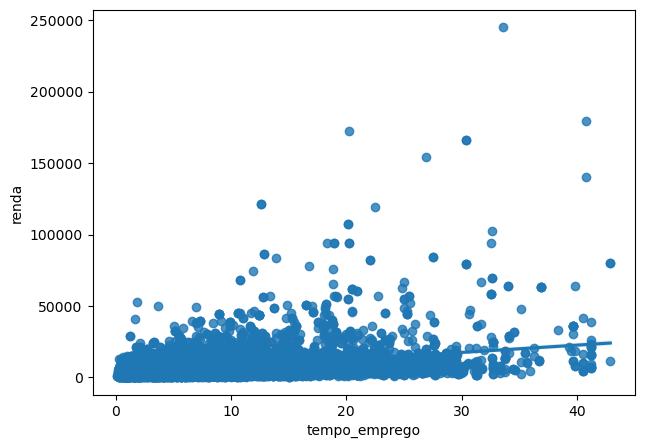

In [262]:
_ = sns.regplot(x='tempo_emprego', y='renda', data = renda)
plt.show()

É possível notar um leve crescimento na reta de tedência de acordo com o aumento do tempo de emprego da pessoa, confirmando com a correlação positiva entre elas.

### Variáveis Qualitativas

Para as variáveis qualitativas, antes das análises da estabilidade temporal, verifiquemos a relação entre as variáveis booleanas ('posse_de_veiculo' e 'posse_de_imovel') com a renda.

<AxesSubplot:xlabel='posse_de_veiculo', ylabel='renda'>

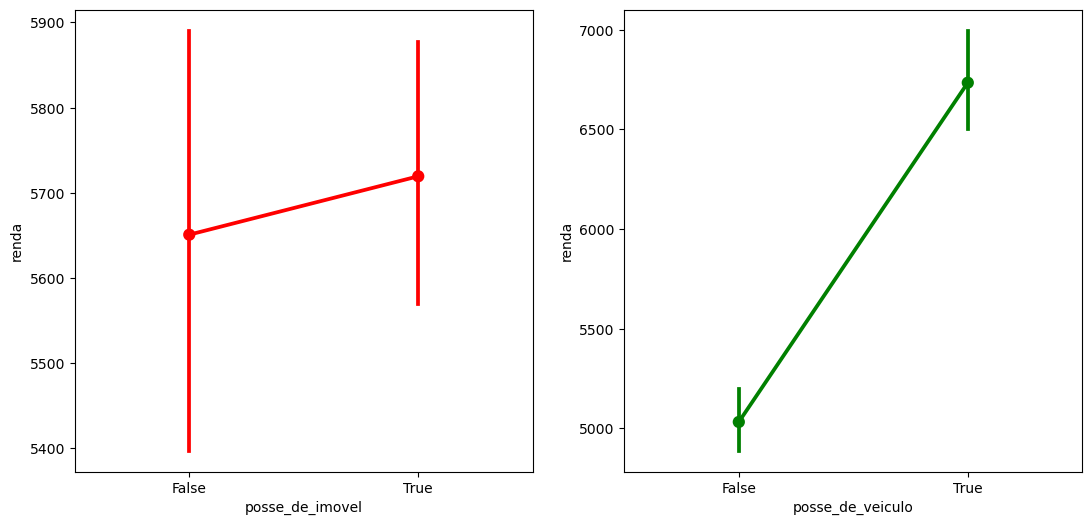

In [263]:
plt.rc('figure', figsize=(13, 6))
fig, axes = plt.subplots(1, 2)

sns.pointplot(x="posse_de_imovel", y="renda",
              data=renda, dodge=True, ci=95,
               ax = axes[0], color='red')

sns.pointplot(x="posse_de_veiculo", y="renda",
              data=renda, dodge=True, ci=95,
              ax = axes[1], color='green')

Analisando os dois gráficos, nota-se:
- Não uma diferença significativa entre a renda das pessoas que possuem imóvel em relação às que não possuem;
- A renda das pessoas que possuem veículo tende a ser maior em relação àquelas que não possuem. Considerando o intervalo de confiança, a diferença é de maior do que 1000 reais.

Dessa forma, a 'posse_de_veiculo' tende a ser uma variável preditora de renda.

Agora, verifiquemos a estabilidade temporal da média da renda de acordo com cada variável qualitativa, além da própria variável explicativa.

##### 'Sexo'

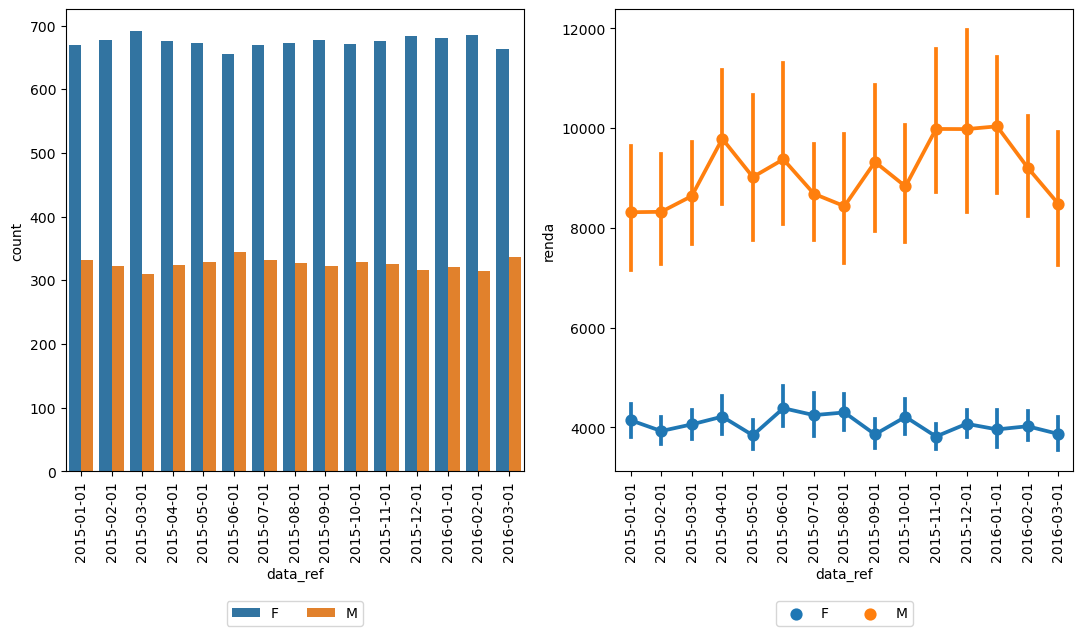

In [264]:
plt.rc('figure', figsize=(13, 6))
fig, axes = plt.subplots(1, 2)

ax0 = axes[0]
estab_sex = sns.countplot(x='data_ref', hue='sexo', data=renda, ax=ax0)
estab_sex.tick_params(axis='x', rotation=90)
estab_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.35),ncol = 3)

ax1 = axes[1]
renda_sex = sns.pointplot(x='data_ref', hue='sexo', y='renda', data=renda, ax=ax1)
renda_sex.tick_params(axis='x', rotation=90)
renda_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.35), ncol = 3)


As quantidades de clientes de cada sexo não se alteraram de forma significativa durante o período em análise, tendo sempre um maior número de mulheres (praticamente o dobro em relação à quantidade de homens). Por outro lado, a renda dos homens foi maior do que a das mulheres, enquanto que a renda feminina ficou em torno de 4000 reais durante o período, a renda masculina variou entre 8000 e 100000 reais (maior do que o dobro da renda feminina).

##### 'posse_de_imovel'

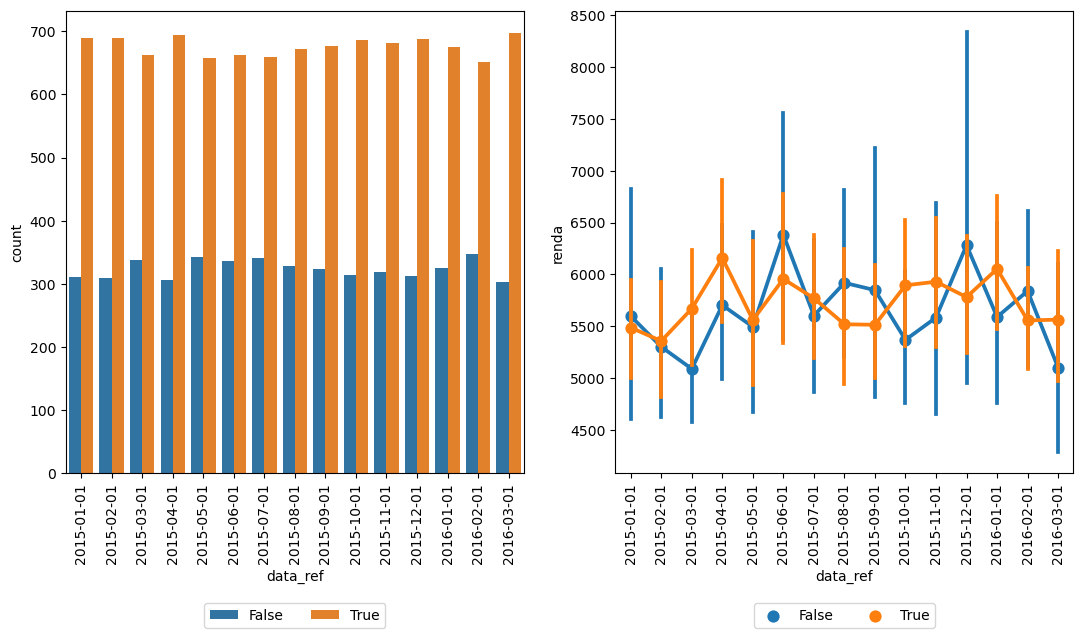

In [265]:
plt.rc('figure', figsize=(13, 6))
fig, axes = plt.subplots(1, 2)

ax0 = axes[0]
estab_sex = sns.countplot(x='data_ref', hue='posse_de_imovel', data=renda, ax=ax0)
estab_sex.tick_params(axis='x', rotation=90)
estab_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.35),ncol = 3)

ax1 = axes[1]
renda_sex = sns.pointplot(x='data_ref', hue='posse_de_imovel', y='renda', data=renda, ax=ax1)
renda_sex.tick_params(axis='x', rotation=90)
renda_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.35), ncol = 3)

Não houveram variações significativas nos números de clientes que têm ou não imóveis, com a maior parte deles possuindo imóvel. Também não foram notadas diferenças entre as rendas em relação a esta variável qualitativa.

##### 'posse_de_veiculo'

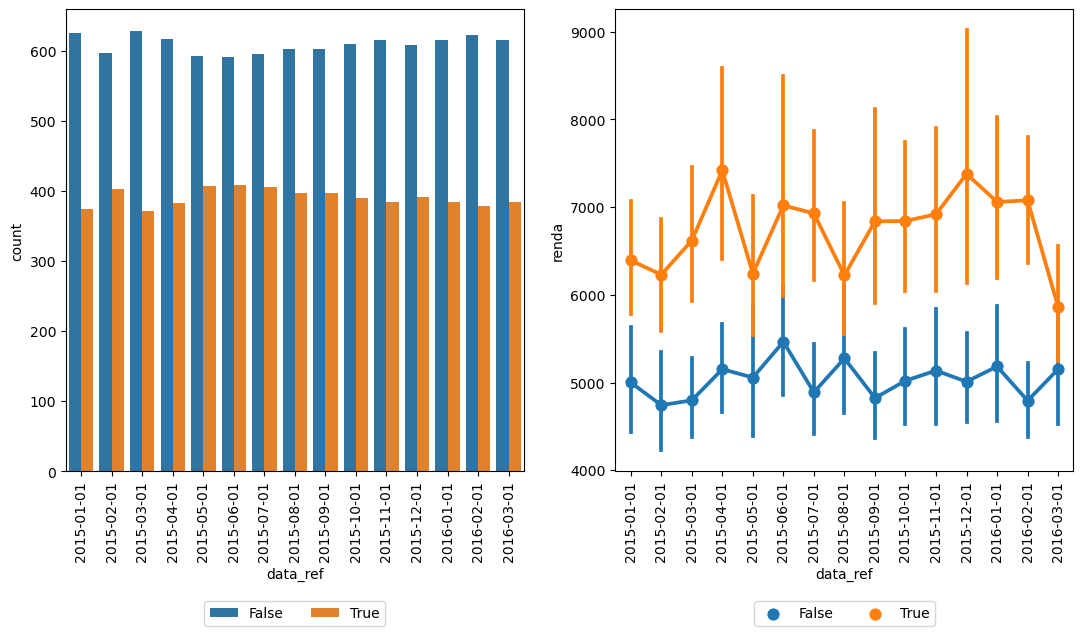

In [266]:
plt.rc('figure', figsize=(13, 6))
fig, axes = plt.subplots(1, 2)

ax0 = axes[0]
estab_sex = sns.countplot(x='data_ref', hue='posse_de_veiculo', data=renda, ax=ax0)
estab_sex.tick_params(axis='x', rotation=90)
estab_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.35),ncol = 3)

ax1 = axes[1]
renda_sex = sns.pointplot(x='data_ref', hue='posse_de_veiculo', y='renda', data=renda, ax=ax1)
renda_sex.tick_params(axis='x', rotation=90)
renda_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.35), ncol = 3)

A maior parte dos clientes analisados durante o intervalo de tempo não possui veículo. Além disso, a renda daqueles que possuem veículo foi maior do que os que não possem, havendo uma breve semelhança entre elas nos meses de Janeiro, Maio, Junho e Agosto de 2015 e Março de 2016.

##### 'tipo_renda'

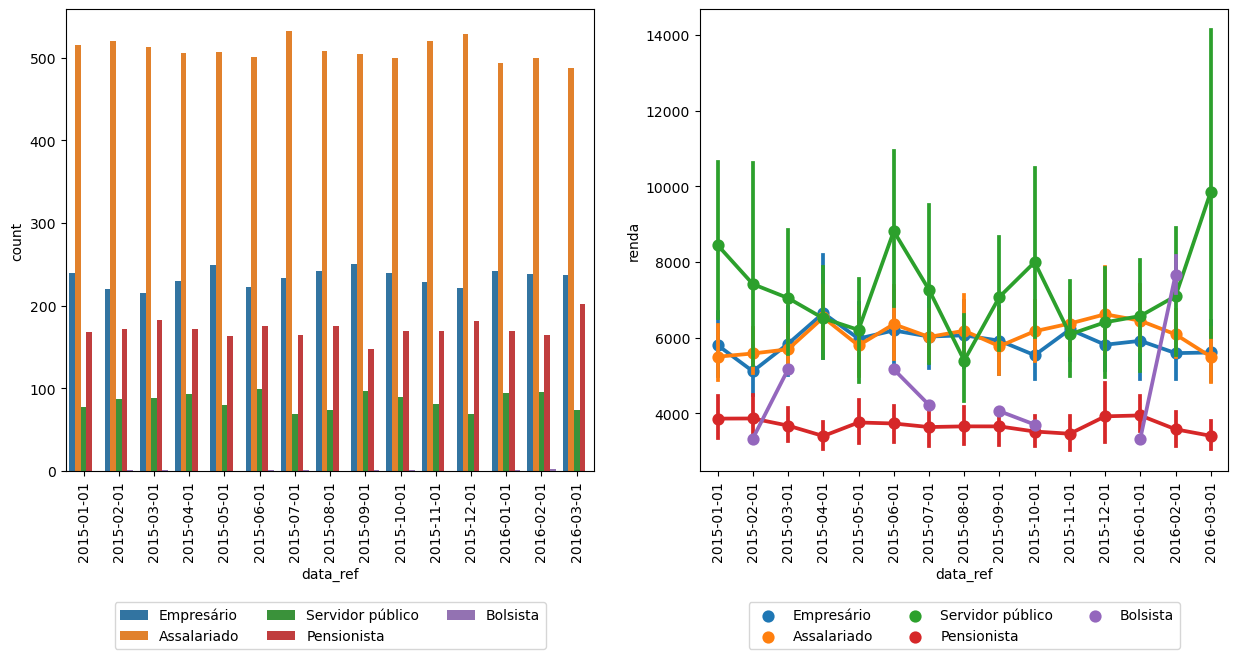

In [267]:
plt.rc('figure', figsize=(15, 6))
fig, axes = plt.subplots(1, 2)

ax0 = axes[0]
estab_sex = sns.countplot(x='data_ref', hue='tipo_renda', data=renda, ax=ax0)
estab_sex.tick_params(axis='x', rotation=90)
estab_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.4),ncol = 3)

ax1 = axes[1]
renda_sex = sns.pointplot(x='data_ref', hue='tipo_renda', y='renda', data=renda, ax=ax1)
renda_sex.tick_params(axis='x', rotation=90)
renda_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.4), ncol = 3)

Não foram notadas variações nas quantidades dos tipos de renda durante todo o intervalo, com maior quantidade dos clientes sendo assalariados, seguidos por empresários e pensionistas. Os que apresentaram menor renda durante todo o período foram os pensionistas, com uma média em torno de 4000 reais. Por outro lado os servidores públicos apresentaram as maiores rendas durante o período, variando entre 6000 e 10000 reais. Os empresários e assalariados tiveram rendas semelhantes, sendo em torno de 6000 reais. No caso dos bolsistas, a quantidade de clientes deste tipo foi muito pequena durante todo o tempo, além de apresentarem variações bruscas em suas rendas, indo de, aproximadamente, 4000 a 8000 reais. 

##### 'educacao'

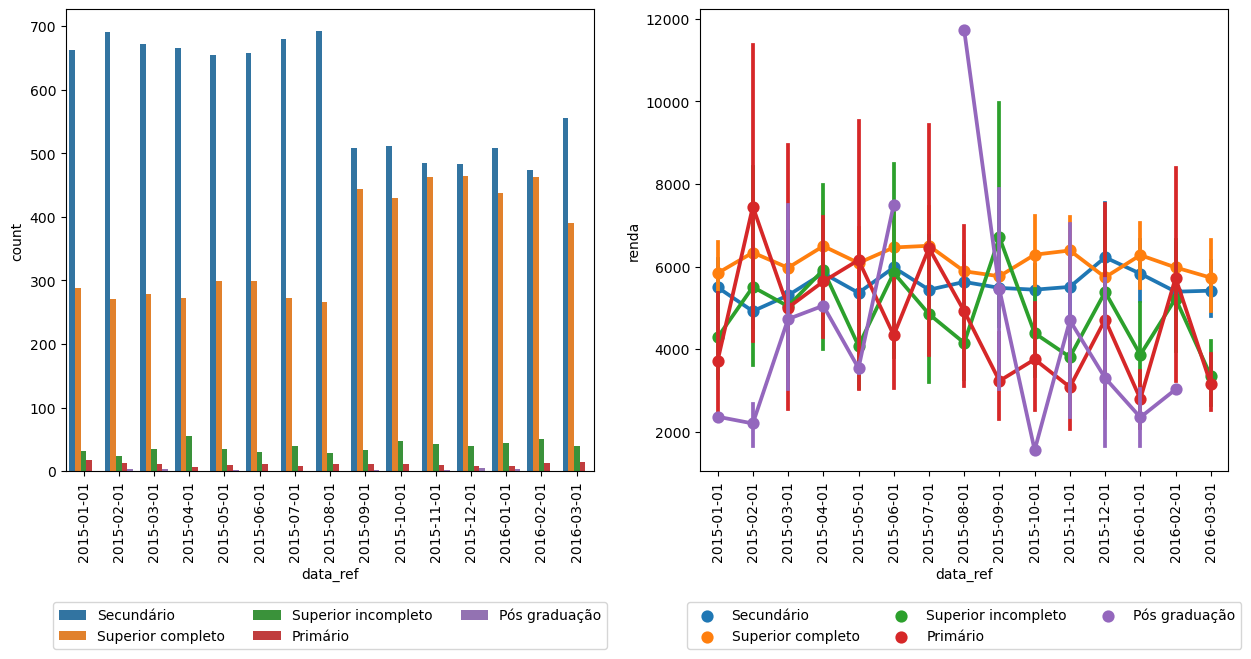

In [268]:
plt.rc('figure', figsize=(15, 6))
fig, axes = plt.subplots(1, 2)

ax0 = axes[0]
estab_sex = sns.countplot(x='data_ref', hue='educacao', data=renda, ax=ax0)
estab_sex.tick_params(axis='x', rotation=90)
estab_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.4),ncol = 3)

ax1 = axes[1]
renda_sex = sns.pointplot(x='data_ref', hue='educacao', y='renda', data=renda, ax=ax1)
renda_sex.tick_params(axis='x', rotation=90)
renda_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.4), ncol = 3)

O níveis de educação predominantes dos dos clientes foram secundário e superior completo, com o nível secundário sendo o mais comum entre janeiro e agosto de 2015 (variando entre 650 a 700 pessoas, enquanto que o nível superior completou ficou entre 250 e 300 pessoas). A partir de setembro, passou a haver uma proximidade entre as quantidades de clientes com nível secundário e superior completo, possivelmente, parte dos que apresentavam apenas o secundário terminaram o nível superior neste período. 

Em relação à renda, nota-se que aquelas dos níveis secundário e superior completo foram semelhantes no tempo de análise, sendo ambas próximas a 6000 reais. Os níveis restantes tiveram grandes variações na renda média, com destaque à Pós graduação, indo de 2000 a 12000 reais.

##### 'tipo_residencia'

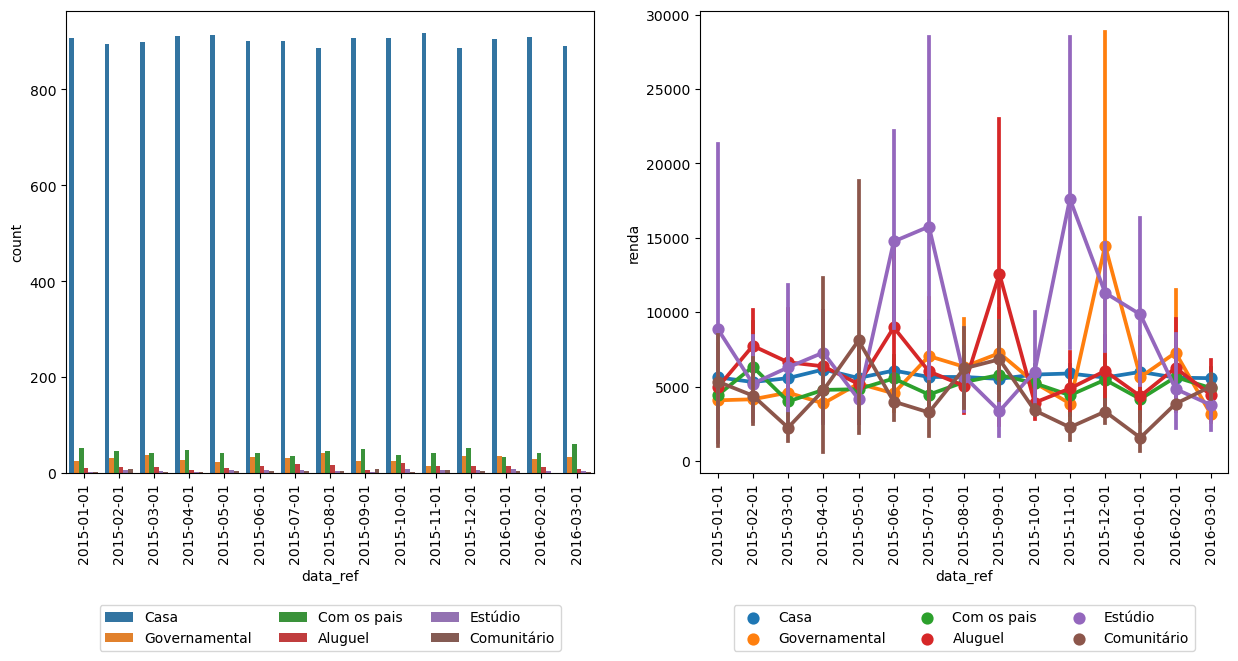

In [269]:
plt.rc('figure', figsize=(15, 6))
fig, axes = plt.subplots(1, 2)

ax0 = axes[0]
estab_sex = sns.countplot(x='data_ref', hue='tipo_residencia', data=renda, ax=ax0)
estab_sex.tick_params(axis='x', rotation=90)
estab_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.4),ncol = 3)

ax1 = axes[1]
renda_sex = sns.pointplot(x='data_ref', hue='tipo_residencia', y='renda', data=renda, ax=ax1)
renda_sex.tick_params(axis='x', rotation=90)
renda_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.4), ncol = 3)

Não foram notadas mudanças nas distribuições dos tipos de residência, com a maior quantidade de pessoas morando em casa (aproximadamente 90% dos clientes) durante o tempo de análise. As pessoas que apresentaram maiores rendas foram os que vivem em estúdio durante a maior parte do tempo, ainda assim, tais rendas variaram entre abaixo de 5000 a acima de 15000 reais. Também foram notadas alterações significativas nas pessoas que vivem de aluguel e aquelas que vivem em residência governamental, principalmente setembro e dezembro de 2015. Os tipos de residência restantes (com os pais, casa e comunitário) tiveram rendas mais estáveis durante este tempo, sendo próximas a 5000 reais.

##### 'estado_civil'

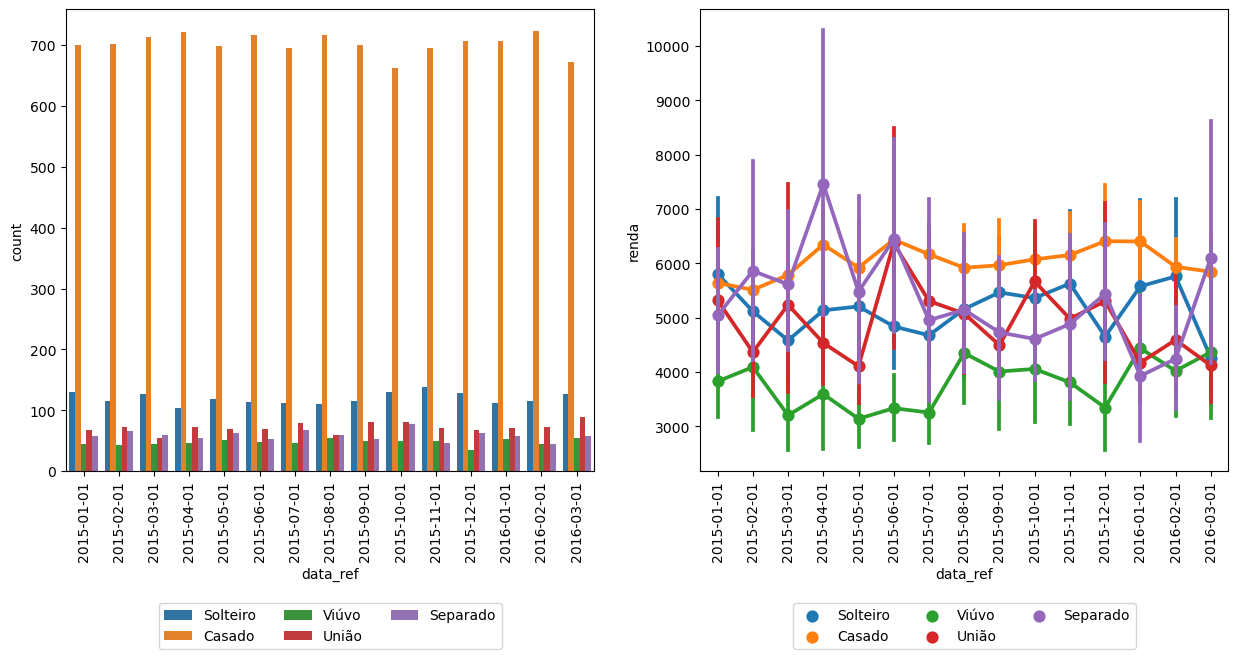

In [270]:
plt.rc('figure', figsize=(15, 6))
fig, axes = plt.subplots(1, 2)

ax0 = axes[0]
estab_sex = sns.countplot(x='data_ref', hue='estado_civil', data=renda, ax=ax0)
estab_sex.tick_params(axis='x', rotation=90)
estab_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.4),ncol = 3)

ax1 = axes[1]
renda_sex = sns.pointplot(x='data_ref', hue='estado_civil', y='renda', data=renda, ax=ax1)
renda_sex.tick_params(axis='x', rotation=90)
renda_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.4), ncol = 3)

Nota-se que durante o tempo de análise, a maior parte das pessoas são casadas (aproximadamente 70% delas) e que não houveram mudanças significativas nas distribuições dos estados civis dos clientes. Além disso, não foram notadas diferenças significativas nas rendas de cada estado civil, com excessão do detalhe de que as pessoas viúvas foram as que tiveram menores rendas durante o ano de 2015.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



#### Seleção e Limpeza

Vejamos quais colunas serão utilizadas na modelagem ao mesmo tempo em que verificamos a quantidade de linhas com dados nulos de
cada variável.

Verificando o número de linhas com valores vazios em cada coluna.

In [271]:
renda.isna().sum()

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

Verifica-se que a única coluna com valores nulos é a "tempo_emprego". Antes de resolver isso, vamos remover a coluna 'Unnamed: 0' uma vez que ela é simplesmente uma repetição dos índices das linhas. Para não alterar os dados originais, vamos criar um novo DataFrame chamado "renda2" sem essa coluna.

In [272]:
renda2 = renda.drop(columns=['Unnamed: 0'], axis=1)

Visualizando a nova tabela, com seus números de colunas e linhas:

In [273]:
print("Número de linhas em renda2: {}".format(renda2.shape[0]))
print("Número de colunas em renda2: {}".format(renda2.shape[1]))
renda2.head()

Número de linhas em renda2: 15000
Número de colunas em renda2: 14


,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


Tratemos agora os dados nulos presentes na coluna 'tempo_emprego', sendo esta justamente a que apresentou maior correlação com a variável renda de acordo com a análise bivariada, o que impede esta coluna de ser removida. Vejamos qual a porcentagem da coluna corresponde a esses dados nulos:

In [274]:
porcentagem = 100*renda2['tempo_emprego'].isna().sum() / renda2.shape[0]
print("Os dados nulos correspondem a {:.2f}% da coluna 'tempo_emprego'.".format(porcentagem))

Os dados nulos correspondem a 17.15% da coluna 'tempo_emprego'.


Visto que a quantidade de dados faltantes correspondem a quase 20% do total, remover as linhas correspondentes causaria uma grande perda de informação. Dessa forma, vamos considerar que esses dados correspondem a pessoas desempregadas ou que acabaram de entrar no emprego e preencher o tempo de emprego com zeros.

In [275]:
# Substituindo dados vazios por zero
renda2['tempo_emprego'].fillna(value=0, inplace=True)

Além de dados nulos, podem haver dados duplicados no DataFrame em questão. Vamos verificar se há e removê-los.

In [276]:
duplicados = renda2.duplicated().sum()
print("Há {} linhas duplicadas em renda2.".format(duplicados))

Há 407 linhas duplicadas em renda2.


In [277]:
# Removendo linhas duplicadas
renda2.drop_duplicates(inplace=True)

Agora que limpamos os dados nulos e duplicados, vamos remover as colunas 'data_ref' e 'id_cliente', uma vez que não terão utilidades diretas na modelagem.

In [278]:
renda2.drop(columns=['data_ref', 'id_cliente'], axis=1, inplace=True)
renda2.reset_index(drop=True, inplace=True)

In [279]:
renda2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14593 entries, 0 to 14592
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   14593 non-null  object 
 1   posse_de_veiculo       14593 non-null  bool   
 2   posse_de_imovel        14593 non-null  bool   
 3   qtd_filhos             14593 non-null  int64  
 4   tipo_renda             14593 non-null  object 
 5   educacao               14593 non-null  object 
 6   estado_civil           14593 non-null  object 
 7   tipo_residencia        14593 non-null  object 
 8   idade                  14593 non-null  int64  
 9   tempo_emprego          14593 non-null  float64
 10  qt_pessoas_residencia  14593 non-null  float64
 11  renda                  14593 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 1.1+ MB


Em relação às seções **construção** e **integração**, não é necessária a construção de novas variáveis, além de que só há uma fonte de dados em questão. Vejamos a seção final desta etapa, a **formatação**. 

#### Formatação

Considerando que a etapa de modelagem não aceita variáveis que não sejam numéricas ou booleanas, vamos converter as variáveis categóricas ('sexo', 'tipo_renda', 'educacao', 'estado_civil' e 'tipo_residencia') em dummies, ou seja, representá-las em formato análogo a booleanas. 

In [280]:
renda2 = pd.get_dummies(renda2)
renda2

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_F,sexo_M,tipo_renda_Assalariado,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,False,True,0,26,6.602740,1.0,8060.34,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,True,True,0,28,7.183562,2.0,1852.15,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,True,True,0,35,0.838356,2.0,2253.89,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,False,True,1,30,4.846575,3.0,6600.77,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,True,False,0,33,4.293151,1.0,6475.97,0,1,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14588,False,True,0,48,13.887671,1.0,7990.58,1,0,0,...,0,1,0,0,0,1,0,0,0,0
14589,False,True,0,57,0.000000,1.0,10093.45,1,0,0,...,0,1,0,0,0,1,0,0,0,0
14590,True,True,0,45,7.832877,2.0,604.82,1,0,1,...,0,0,0,0,0,1,0,0,0,0
14591,True,False,0,36,4.298630,2.0,3352.27,0,1,0,...,0,0,0,0,0,1,0,0,0,0


Agora os dados estão prontos para modelagem. Vejamos a próxima etapa.

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:


- Selecionar a técnica de modelagem

Considerando que a variável resposta 'renda' é do tipo quantitativa, será utilizada a técnica de árvores de regressão (**Decision Tree Regression**), pois é uma técnica bastante versátil e robusta que captura bem padrões complexos nos dados, relativamente fácil de se usar e que costuma produzir excelentes resultados para uma classificação como estas.

- Desenho do teste

Antes de rodar o modelo precisamos construir um desenho do teste que será realizado. Para desenvolver um modelo como este, é necessário dividir a base em duas, uma chamada ```treinamento```, onde o algoritmo 'aprende' utilizando 70% dos dados, e outra chamada ```teste```, onde o algoritmo é avaliado a partir dos 30% restantes. Essa prática fornece uma métrica de avaliação mais fidedigna do algoritmo.

- Avaliação do modelo

O modelo será avaliado a partir do seu coeficiente de determinação (**R²**), comparação entre os valores de renda originais com os preditos pela árvore de regressão e a matriz de correlação deles. Em relação ao R², quanto mais próximo de 1, melhor o ajuste. Entretanto, isto também pode corresponder a um overfitting, o que será evitado. 

### Dividindo a base em treino e teste

In [281]:
# Tirando a variável resposta da base de treinamento
X = renda2.drop('renda', axis=1)
y = renda2['renda']

# Formando as bases de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3,
                                                        train_size=0.7,
                                                        random_state=0)

In [282]:
X_treino

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_F,sexo_M,tipo_renda_Assalariado,tipo_renda_Bolsista,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
7150,True,True,4,37,11.421918,6.0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3658,False,False,0,51,27.030137,1.0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1855,True,True,0,46,6.860274,1.0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,0
8038,False,False,1,34,3.638356,3.0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
3907,True,False,0,40,8.882192,2.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,False,True,0,32,12.556164,2.0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3264,False,True,0,53,3.879452,2.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
9845,False,True,0,50,6.687671,1.0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
10799,False,False,0,36,8.600000,2.0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [283]:
y_treino

7150     15288.14
3658      3472.39
1855      9692.09
8038      8837.58
3907     21200.99
           ...   
13123     4649.18
3264      1941.14
9845      1671.14
10799     6582.25
2732      2896.64
Name: renda, Length: 10215, dtype: float64

### Rodando o modelo
A função DecisionTreeRegressor gera a estrutura da árvore de regressão, onde o parâmetro ```max_depth``` define a profundidade da árvore, enquanto que o ```min_sample_leaf``` representa o número mínimo de folhas que a árvore de apresentar. Normalmente o coeficiente de correlação do modelo tende a aumentar com a profundidade e o número de folhas, pelo menos até um certo limite - e aumenta também o recurso computacional demandado. Com isto, serão geradas árvores cujas profunidades variam entre 2 e 19, o número de folhas vai de 2 a 9, e serão observados seus respectivos coeficientes de correlação.

Para determinar a árvore de regressão mais adequada para este projeto, façamos um DataFrame onde encontram-se a profundidade, o número mínimo de folhas e o R² de cada árvore ajustada. Onde as árvores são geradas com a base de treino e o R² é calculado com o ajuste da base de teste nela. Com este DataFrame, será possível escolher a árvore com maior R².

In [284]:
arvores = pd.DataFrame(columns=['max_depth', 'min_samples_leaf', 'R²'])

In [285]:
for profundidade in range(2, 20):
    for folhas in range(2, 10):
        arvore = DecisionTreeRegressor(min_samples_leaf = folhas,
                                       max_depth = profundidade,
                                       random_state = 0)
        arvore.fit(X_treino, y_treino)
        R2 = arvore.score(X_teste, y_teste)        
        comprimento = len(arvores)
        arvores.loc[comprimento] = [profundidade, folhas, R2]

Ordenando as árvores geradas de acordo com seus R²:

In [286]:
arvores.sort_values(by=['R²'], axis=0, ascending=False).head(10)

,max_depth,min_samples_leaf,R²
40,7.0,2.0,0.427394
48,8.0,2.0,0.425900
96,14.0,2.0,0.415637
56,9.0,2.0,0.415543
16,4.0,2.0,0.411778
32,6.0,2.0,0.411453
112,16.0,2.0,0.405570
41,7.0,3.0,0.404740
136,19.0,2.0,0.402311
19,4.0,5.0,0.401887


A árvore que apresentou melhor R² foi a de profundidade 7 e número mínimo de folhas = 2. Vamos utilizá-la para o modelo.

In [287]:
melhor_arvore = DecisionTreeRegressor(min_samples_leaf = 2,
                                      max_depth = 7,
                                      random_state = 0)
melhor_arvore.fit(X_treino, y_treino)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=2, random_state=0)

Visualizando a árvore graficamente:

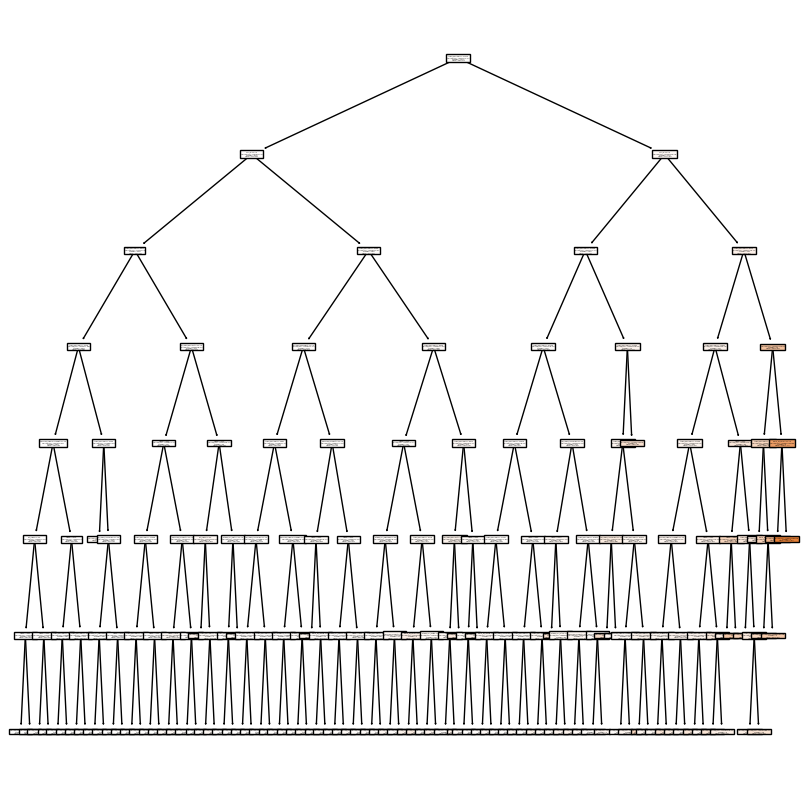

In [288]:
plt.rc('figure', figsize=(10, 10))
arvore_impressa = tree.plot_tree(melhor_arvore, 
               feature_names=X_treino.columns,  
               filled=True) 

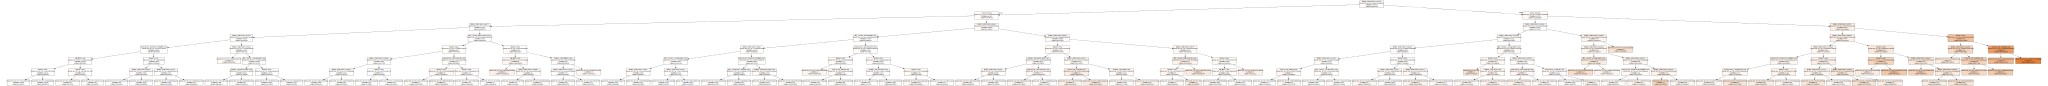

In [289]:
# Impressão da árvore final ampliada
# Dados da árvore
dados_arvore = tree.export_graphviz(melhor_arvore, out_file=None, 
                                    feature_names=X_treino.columns,
                                    filled=True)

# Mostra a árvore e salva ela na pasta output
grafico = graphviz.Source(dados_arvore, format="jpeg", directory="./output") 
grafico.render(filename="arvore_impressa")
grafico

## Etapa 5 Crisp-DM: Avaliação dos resultados


Para a avaliação dos resultados, vejamos quais os R² dos ajustes dos dados presentes nas bases de treino e de teste da árvore resultante. Além disso, vamos comparar alguns dos valores de renda presentes nos dados com os que foram gerados pela árvore.


#### R² dos ajustes das bases na árvore

In [290]:
r2_treino = melhor_arvore.score(X_treino, y_treino)
r2_teste = melhor_arvore.score(X_teste, y_teste)

print("O R² do ajuste dos dados da base de treino na árvore é: {:.2f}".format(r2_treino))
print("O R² do ajuste dos dados da base de teste na árvore é: {:.2f}".format(r2_teste))

O R² do ajuste dos dados da base de treino na árvore é: 0.60
O R² do ajuste dos dados da base de teste na árvore é: 0.43


O ajuste da base de teste à árvore de regressão apresentou coeficiente de determinação inferior ao ajuste da base de treino. Ainda que a árvore tenha sido gerada com os dados de treino, verifica-se que o R² do ajuste deles foi inferior a 1. Ainda que isto possa parecer estranho, está dentro do esperado, negando o caso de overfitting. 

#### Comparação entre os valores de Renda reais e os preditos

In [291]:
# Df com rendas reais e preditas
renda_predita = melhor_arvore.predict(X_teste)
renda_predita_formatada = [round(y, 2) for y in renda_predita]
renda_real = y_teste
dados = {'renda': renda_real, 'renda_predita': renda_predita_formatada}

comparacao = pd.DataFrame(dados)
comparacao.reset_index(drop=True).head(10)

,renda,renda_predita
0,3101.24,3167.35
1,1205.98,2938.39
2,18630.50,9488.03
3,3863.68,5074.44
4,3998.44,9177.47
5,3901.03,3689.02
6,4264.23,7547.36
7,1581.39,3167.35
8,633.01,2225.30
9,2555.60,3167.35


In [292]:
comparacao[['renda','renda_predita']].corr()

,renda,renda_predita
renda,1.000000,0.653884
renda_predita,0.653884,1.000000


A matriz de correlação mostra que os valores preditos da renda são condizentes com 65% dos valores reais. Dessa forma, a chance da árvore errar a renda de uma pessoa a partir das características dela é de 35%. 

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

A implantação será por meio da função definida abaixo, na qual ela recebe as informações do usuário e as submete ao método predict da árvore de regressão, utilizando a árvore com melhor R-quadrado obtida na etapa 5.

In [293]:
def preve_renda(arvore=melhor_arvore):
    '''
    Esta função utiliza a árvore de regressão com melhor R-quadrado obtida na 
    etapa 5. Para isto, ela cria um novo DataFrame vazio com as colunas presen-
    tes no utilizado nas etapas anteriores, além disso, pede para que o usuário 
    preencha cada uma delas (educação, tipo de residência, estado civil, etc).
    Estas informações são submetidas ao método predict() da árvore de regressão
    para prever a renda do usuário.
    '''
    # Cria um DataFrame vazio onde são inseridos os dados do usuário
    colunas = renda2.columns.drop('renda')
    linha = [0 for i in range(len(colunas))] 
    dados_usuario = pd.DataFrame(columns=colunas)
    dados_usuario.loc[0] = linha

    # Pede para que o usuário forneça suas informções
    print("Olá! Vamos fazer uma previsão de renda para você a partir de algumas informações.")
    print("Para isto, responda as perguntas abaixo.")
    print()

    # Preenche a coluna a respeito da posse de veículo
    veiculo = 0
    while veiculo == 0:
        veiculo = str(input("Você tem veículo? (Sim ou Não): "))
        if veiculo in ["Sim", "sim", "SIM"]:
            dados_usuario.at[0, 'posse_de_veiculo'] = True
        elif veiculo in ["Não", "NÃO", "NAO", "nao", "não"]:
            dados_usuario.at[0, 'posse_de_veiculo'] = False
        else:
            veiculo = 0
    print()

    # Preenche a coluna a respeito da posse de imóvel
    imovel = 0
    while imovel == 0:
        imovel = str(input("Você tem imóvel? (Sim ou Não): "))
        if imovel in ["Sim", "sim", "SIM"]:
            dados_usuario.at[0, 'posse_de_imovel'] = True
        elif imovel in ["Não", "NÃO", "NAO", "nao", "não"]:
            dados_usuario.at[0, 'posse_de_imovel'] = False
        else:
            imovel = 0   
    print()

    # Preenche a coluna a respeito da quantidade de filhos        
    filhos = int(input("Quantos filhos você tem? "))
    dados_usuario.at[0, 'qtd_filhos'] = filhos
    print()

    # Preenche a coluna a respeito da idade 
    idade = int(input("Quantos anos você tem? "))
    dados_usuario.at[0, 'idade'] = idade
    print()

    # Preenche a coluna a respeito do tempo de emprego
    emprego = float(input("Há quantos anos você trabalha? "))
    dados_usuario.at[0, 'tempo_emprego'] = emprego
    print()
    
    # Preenche a coluna a respeito do número de pessoas na residência
    n_pessoas = int(input("Qual o número de pessoas na sua residência? "))
    dados_usuario.at[0, 'qt_pessoas_residencia'] = n_pessoas
    print()
    
    # Preenche a coluna a respeito do sexo
    sexos = ["M", "m", "F", "f"]
    sexo = "p"
    while sexo not in sexos:
        sexo = str(input("Qual o seu sexo? (M ou F): "))
        if sexo in ["M", "m"]:
            dados_usuario.at[0, 'sexo_M'] = 1
        elif sexo in ["F", "f"]:
            dados_usuario.at[0, 'sexo_F'] = 1
    print()
    
    # Preenche a coluna a respeito do tipo de renda
    tipos_renda = ["Assalariado", "Bolsista", "Empresário", "Pensionista", "Servidor público"]
    tipo = 0
    while tipo not in tipos_renda:
        print(tipos_renda)
        tipo = str(input("Informe seu tipo de renda, para isso, escolha uma das opções acima: "))
        tipo = tipo.capitalize()
        if tipo == "Assalariado":
            dados_usuario.at[0, 'tipo_renda_Assalariado'] = 1
        elif tipo == "Bolsista":
            dados_usuario.at[0, 'tipo_renda_Bolsista'] = 1
        elif tipo == "Empresário":
            dados_usuario.at[0, 'tipo_renda_Empresário'] = 1
        elif tipo == "Pensionista":
            dados_usuario.at[0, 'tipo_renda_Pensionista'] = 1
        elif tipo == "Servidor público":
            dados_usuario.at[0, 'tipo_renda_Servidor público'] = 1
    print()
        
    # Preenche a coluna a respeito do nível de educação
    nivel_educacao = ["Primário", "Pós graduação", "Secundário", "Superior completo", "Superior incompleto"]
    educacao = 0
    while educacao not in nivel_educacao:
        print(nivel_educacao)
        educacao = str(input("Informe seu nível de educação, para isso, escolha uma das opções acima: "))
        educacao = educacao.capitalize()
        if educacao == "Primário":
            dados_usuario.at[0, 'educacao_Primário'] = 1
        elif educacao == "Pós graduação":
            dados_usuario.at[0, 'educacao_Pós graduação'] = 1
        elif educacao == "Secundário":
            dados_usuario.at[0, 'educacao_Secundário'] = 1
        elif educacao == "Superior completo":
            dados_usuario.at[0, 'educacao_Superior completo'] = 1
        elif educacao == "Superior incompleto":
            dados_usuario.at[0, 'educacao_Superior incompleto'] = 1
    print()

    # Preenche a coluna a respeito do estado civil
    estado_civil = ["Casado", "Separado", "Solteiro", "União", "Viúvo"]
    estado = 0
    while estado not in estado_civil:
        print(estado_civil)
        estado = str(input("Informe seu nível de educação, para isso, escolha uma das opções acima: "))
        estado = estado.capitalize()
        if estado == "Casado":
            dados_usuario.at[0, 'estado_civil_Casado'] = 1
        elif estado == "Separado":
            dados_usuario.at[0, 'estado_civil_Separado'] = 1
        elif estado == "Solteiro":
            dados_usuario.at[0, 'estado_civil_Solteiro'] = 1
        elif estado == "União":
            dados_usuario.at[0, 'estado_civil_União'] = 1
        elif estado == "Viúvo":
            dados_usuario.at[0, 'estado_civil_Viúvo'] = 1
    print()

    # Preenche a coluna a respeito do tipo de residência
    tipo_residencia = ["Aluguel", "Casa", "Com os pais", "Comunitário", "Estúdio", "Governamental"]
    residencia = 0
    while residencia not in tipo_residencia:
        print(tipo_residencia)
        residencia = str(input("Informe seu tipo de residência, para isso, escolha uma das opções acima: "))
        residencia = residencia.capitalize()
        if residencia == "Aluguel":
            dados_usuario.at[0, 'tipo_residencia_Aluguel'] = 1
        elif residencia == "Casa":
            dados_usuario.at[0, 'tipo_residencia_Casa'] = 1
        elif residencia == "Com os pais":
            dados_usuario.at[0, 'tipo_residencia_Com os pais'] = 1
        elif residencia == "Comunitário":
            dados_usuario.at[0, 'tipo_residencia_Comunitário'] = 1
        elif residencia == "Estúdio":
            dados_usuario.at[0, 'tipo_residencia_Estúdio'] = 1
        elif residencia == "Governamental":
            dados_usuario.at[0, 'tipo_residencia_Governamental'] = 1    
    print()
        
    # Submete os dados ao método predict da árvore de regressão
    predicao = arvore.predict(dados_usuario)[0]
    predicao_formatada = round(predicao, 2)
    print("A sua renda mensal será de", predicao_formatada, "reais.")
    
    return

Rode a próxima célula para fazer uma previsão de sua renda.

In [294]:
# Roda a função de previsao de renda
preve_renda()

Olá! Vamos fazer uma previsão de renda para você a partir de algumas informações.
Para isto, responda as perguntas abaixo.

Você tem veículo? (Sim ou Não): sim

Você tem imóvel? (Sim ou Não): sim

Quantos filhos você tem? 0

Quantos anos você tem? 27

Há quantos anos você trabalha? 0

Qual o número de pessoas na sua residência? 4

Qual o seu sexo? (M ou F): m

['Assalariado', 'Bolsista', 'Empresário', 'Pensionista', 'Servidor público']
Informe seu tipo de renda, para isso, escolha uma das opções acima: Bolsista

['Primário', 'Pós graduação', 'Secundário', 'Superior completo', 'Superior incompleto']
Informe seu nível de educação, para isso, escolha uma das opções acima: Superior completo

['Casado', 'Separado', 'Solteiro', 'União', 'Viúvo']
Informe seu nível de educação, para isso, escolha uma das opções acima: Solteiro

['Aluguel', 'Casa', 'Com os pais', 'Comunitário', 'Estúdio', 'Governamental']
Informe seu tipo de residência, para isso, escolha uma das opções acima: Com os pais

A su